<a href="https://colab.research.google.com/github/SiddhantMeshram/First/blob/master/Segnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import random

import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout,UpSampling2D,Conv2DTranspose

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate, add
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip /content/drive/'MyDrive'/portrait256 -d portrait256
%rm -rf 'portrait256/__MACOSX'

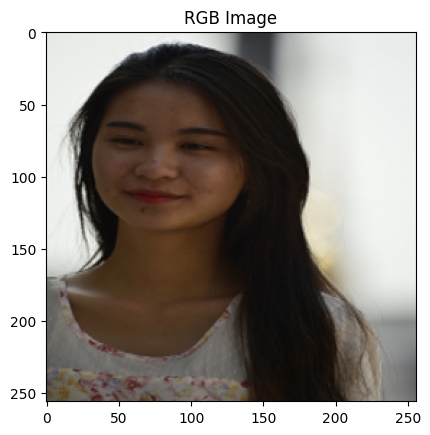

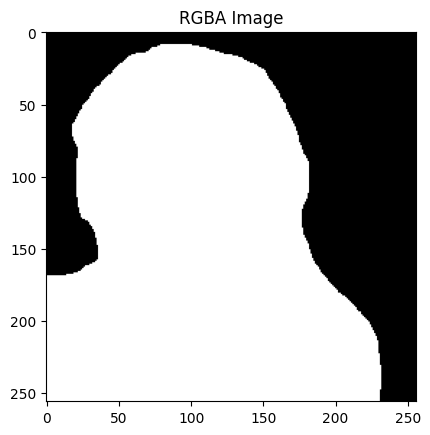

In [ ]:
path = 'portrait256/portrait256/images/img/00004.png'
image = plt.imread(path)
plt.title('RGB Image')
plt.imshow(image)
plt.show()

path = 'portrait256/portrait256/masks/msk/00004.png'
image = plt.imread(path)
plt.title('RGBA Image')
plt.imshow(image)
plt.show()

In [ ]:
directory = 'portrait256'
image_files = []
mask_files = []
for subdir, _, files in os.walk(directory):
    if subdir.endswith("img"):
        image_files.extend([os.path.join(subdir, f) for f in files])
        image_files.sort()
    elif subdir.endswith("msk"):
        mask_files.extend([os.path.join(subdir, f) for f in files])
        mask_files.sort()

x_train, x_test, y_train, y_test = train_test_split(image_files, mask_files, test_size=0.1)

In [ ]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [ ]:
def segnet():

    input1=Input((256,256,3))

    conv1=Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(input1)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    c1=BatchNormalization()(conv2)
    drop1=Dropout(0.1)(c1)
    pool1=MaxPooling2D(pool_size=(2, 2))(drop1)

    conv1=Conv2D(128,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool1)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(128,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    c2=BatchNormalization()(conv2)
    drop2=Dropout(0.1)(c2)
    pool2=MaxPooling2D(pool_size=(2, 2))(drop2)

    conv1=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool2)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    c3=BatchNormalization()(conv3)
    drop3=Dropout(0.1)(c3)
    pool3=MaxPooling2D(pool_size=(2, 2))(drop3)

    conv1=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool3)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    c4=BatchNormalization()(conv3)
    drop4=Dropout(0.1)(c4)
    pool4=MaxPooling2D(pool_size=(2, 2))(drop4)

    conv1=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool4)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    c5=BatchNormalization()(conv3)
    drop5=Dropout(0.1)(c5)
    pool5=MaxPooling2D(pool_size=(2, 2))(drop5)


    up1=Conv2D(1024,2, activation = 'relu', padding = 'same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(pool5))
    merge1=concatenate([c5,up1], axis =3)

    conv1=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge1)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    batch3=BatchNormalization()(conv3)
    batch3=Dropout(0.2)(batch3)


    up2=Conv2D(512,2, activation = 'relu', padding = 'same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(batch3))
    merge2=concatenate([c4,up2], axis =3)

    conv1=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge2)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    batch3=BatchNormalization()(conv3)
    batch3=Dropout(0.2)(batch3)


    up3 =Conv2D(256,2, activation = 'relu', padding = 'same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(batch3))
    merge3 = concatenate([c3,up3], axis =3)

    conv1=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge3)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    batch3=BatchNormalization()(conv3)
    batch3=Dropout(0.2)(batch3)


    up4 =Conv2D(128,2, activation = 'relu', padding = 'same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(batch3))
    merge4=concatenate([c2,up4], axis =3)

    conv1=Conv2D(128,2,activation='relu',padding='same',kernel_initializer='he_normal')(merge4)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(128,2,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    batch2=Dropout(0.2)(batch2)


    up5 =Conv2D(64,1, activation = 'relu', padding = 'same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(batch2))
    merge5=concatenate([c1,up5], axis =3)

    conv1=Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge5)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)


    output=Conv2D(1,(1,1),activation='sigmoid')(batch2)

    model=Model(input1,output)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy",tf.keras.metrics.MeanIoU(num_classes=2)])
    return model

In [ ]:
def convert_colors_to_classes(img):
    img = np.sum(img, axis = 2)
    mask = np.zeros_like(img)
    mask[img <= 3] = 1

    return mask

In [ ]:
BATCH_SIZE = 20
TRAINING_SIZE = 12000
TEST_SIZE = 1200

In [ ]:
def train_generator(image_paths, mask_paths, batch_size=BATCH_SIZE):
    while True:
        sampled_files = random.sample(list(zip(image_paths, mask_paths)), TRAINING_SIZE)
        for i in range(0, TRAINING_SIZE, batch_size):
            x_batch = np.array([load_image(image_path) for image_path, _ in sampled_files[i : i + batch_size]])
            y_batch = np.array([convert_colors_to_classes(load_image(mask_path)) for _, mask_path in sampled_files[i : i + batch_size]])

            yield x_batch, y_batch

In [ ]:
def test_generator(image_paths, mask_paths, batch_size=BATCH_SIZE):
    while True:
        sampled_files = random.sample(list(zip(image_paths, mask_paths)), TEST_SIZE)
        for i in range(0, TEST_SIZE, batch_size):
            x_batch = np.array([load_image(image_path) for image_path, _ in sampled_files[i : i + batch_size]])
            y_batch = np.array([convert_colors_to_classes(load_image(mask_path)) for _, mask_path in sampled_files[i : i + batch_size]])

            yield x_batch, y_batch

In [ ]:
train_gen = train_generator(x_train, y_train)
valid_gen = test_generator(x_test, y_test)

In [ ]:
segnet_model = segnet()

In [ ]:
history = segnet_model.fit(train_gen, steps_per_epoch = TRAINING_SIZE // BATCH_SIZE,
                           epochs = 10,
                           validation_data = valid_gen,
                           validation_steps = TEST_SIZE // BATCH_SIZE)

Epoch 1/10
600/600 [==============================] - 1343s 2s/step - loss: 0.1992 - accuracy: 0.9188 - mean_io_u: 0.2950 - val_loss: 0.1055 - val_accuracy: 0.9614 - val_mean_io_u: 0.2956
Epoch 2/10
600/600 [==============================] - 1268s 2s/step - loss: 0.0827 - accuracy: 0.9694 - mean_io_u: 0.2999 - val_loss: 0.0675 - val_accuracy: 0.9752 - val_mean_io_u: 0.3210
Epoch 3/10
600/600 [==============================] - 1258s 2s/step - loss: 0.0585 - accuracy: 0.9787 - mean_io_u: 0.3027 - val_loss: 0.0516 - val_accuracy: 0.9810 - val_mean_io_u: 0.3534
Epoch 4/10
600/600 [==============================] - 1268s 2s/step - loss: 0.0455 - accuracy: 0.9832 - mean_io_u: 0.3053 - val_loss: 0.0479 - val_accuracy: 0.9827 - val_mean_io_u: 0.3087
Epoch 5/10
600/600 [==============================] - 1258s 2s/step - loss: 0.0360 - accuracy: 0.9867 - mean_io_u: 0.3051 - val_loss: 0.0396 - val_accuracy: 0.9860 - val_mean_io_u: 0.3467
Epoch 6/10
600/600 [==============================] - 1257s 

In [ ]:
# segnet_model.save('/content/drive/MyDrive/trained_segnet_model.keras')
# segnet_model.save('best_model.keras')

In [ ]:
image_segmentor = load_model('/content/drive/MyDrive/trained_segnet_model.keras')

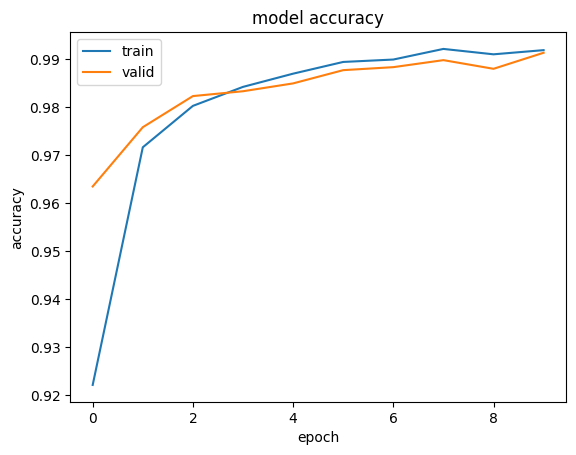

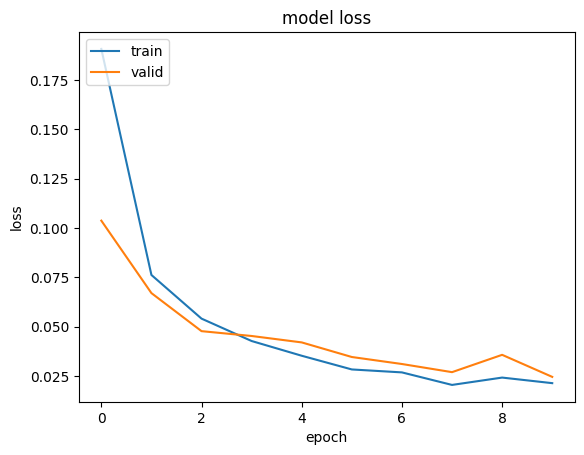

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
images = []
actual_masks = []
random_numbers = random.sample(range(0, len(x_test)), 3)
for k in random_numbers:
    images.append(load_image(x_test[k]))
    actual_masks.append(load_image(y_test[k]))

In [ ]:
predictions = []
for i in range(3):
    segmented_image = segnet_model([images[i].reshape(1,256,256,3)])
    segmented_image = np.array(segmented_image < 0.5, dtype=int).reshape(256, 256)
    bg_ind = np.where(segmented_image == 0)

    prediction = images[i].copy()
    prediction[bg_ind[0], bg_ind[1], :] = [0, 0, 0]
    predictions.append(prediction)

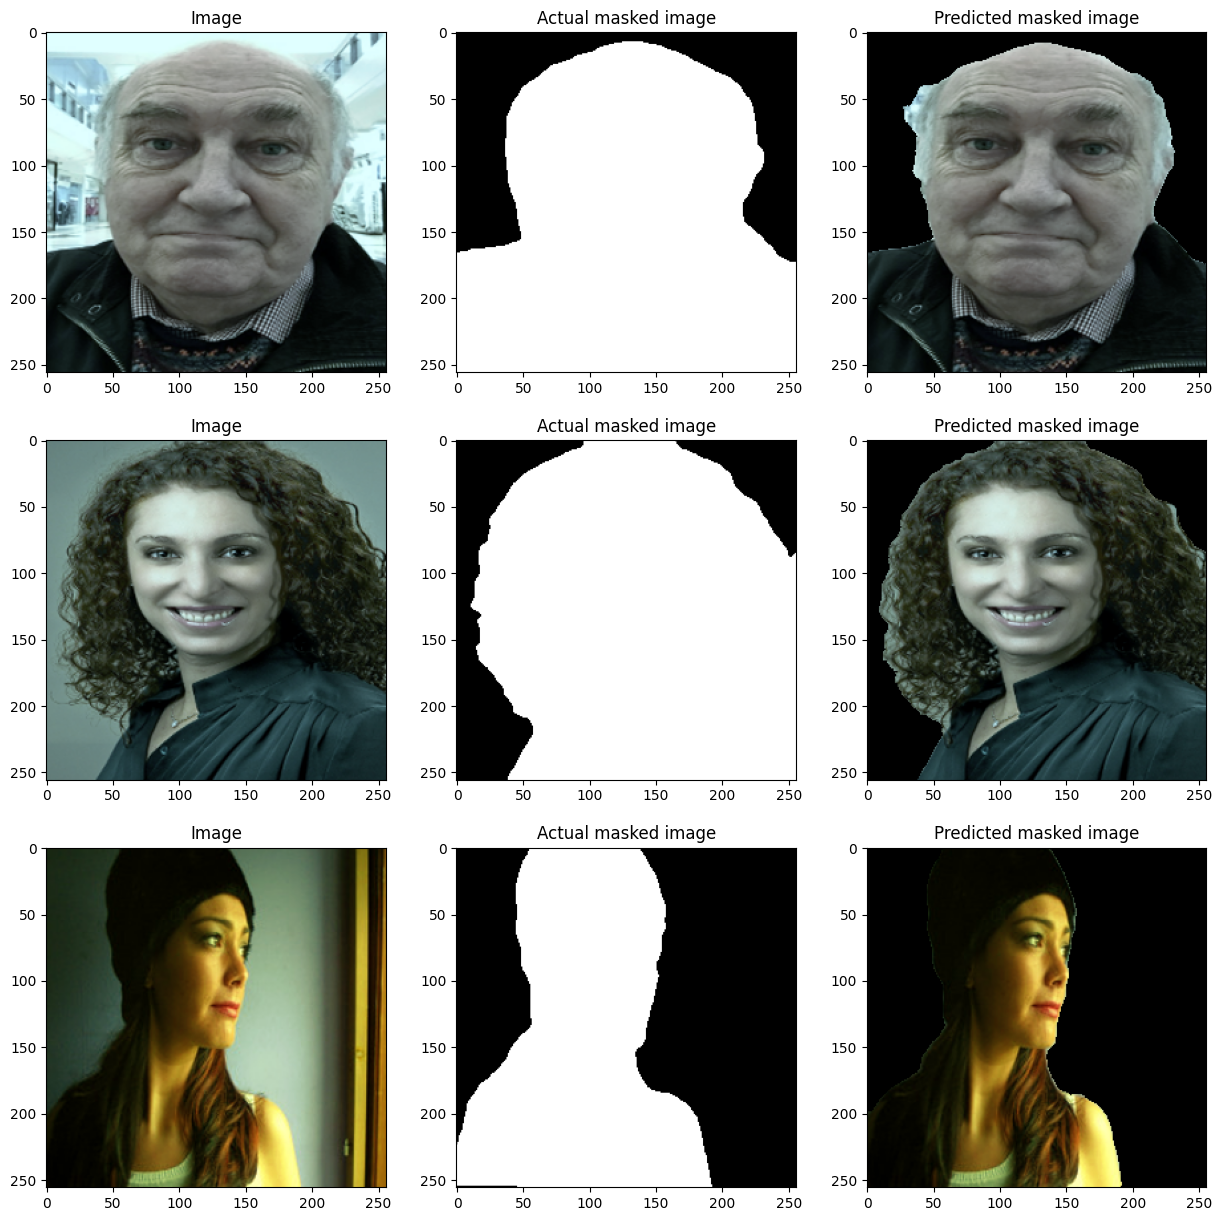

In [ ]:
fig, axs = plt.subplots(3, 3,figsize=(15,15))
for i in range(3):
    axs[i][0].set_title('Image')
    axs[i][0].imshow(images[i])
    axs[i][1].set_title('Actual masked image')
    axs[i][1].imshow(actual_masks[i])
    axs[i][2].set_title('Predicted masked image')
    axs[i][2].imshow(predictions[i])

plt.show()